

---



---


# KNN x Regressão Logística x SVM x **MLP** - Iris Dataset (duas componentes principais)

Este notebook mostra o uso de métodos de aprendizado de máquina existentes na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) para realizar a classificação do conjunto de dados **Iris** ([Iris Dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)), considerando as suas duas componentes principais.

Os **algoritmos de aprendizagem de máquina** utilizados são:

* [KNeighborsClassifier - KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): algoritmo de k-vizinhos mais próximos
* [LogisticRegression - LogReg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression): Regressão Logística
*[Support Vector Machines - SVM](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm): Máquina de Vetores de Suporte
*[MLPClassifier - MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier): rede neural de perceptrons multicamadas



**Iris Dataset**

O conjunto de dados Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher com o objetivo de quantificar a variação morfológica das flores da íris de três espécies relacionadas. 

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante para distinguir as espécies umas das outras.

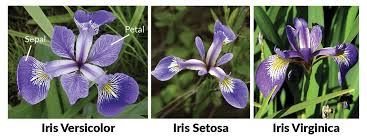

- Número de classes: 3 (setosa, virginica e versicolor)
- Amostras por classe: 50
- Total de amostras: 150
- Número de atributos (dimensionalidade): 4 (comprimento das sépalas, largura das sépalas, comprimento das sépalas e largura das pétalas)



---



---



## Importa módulo com funções para medir o desempenho do classificador

In [11]:
from sklearn import metrics

## Função que plota as fronteiras de decisão do classificador

Baseada em:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py


In [12]:
import numpy as np
def plot_decision_bound(classifier, X, y):
    # Atribui-se uma cor para cada ponto na malha [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamanho do passo da malha (escala)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Coloca o resultado em um gráfico de cores
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plota os pontos de X
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    #plt.show()

### Importação dos dados - Iris dataset

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names
X = iris.data
y = iris.target
#print(type(X)) 
#print(X.shape)
#print(X)
#print(y.shape)
#print(y)

## Redução de dimensionalidade usando PCA (*Principal Component Analysis*)

Aplicamos o algoritmo de redução de dimensionalidade [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) para visualizarmos os dados em 2 dimensões.

Essa técnica de análise dos componentes principais é comumente usada para
compressão, visualização e classificação de dados. A ideia central é reduzir a dimensionalidade de um conjunto de dados com o mínimo de perda de informação.

As componentes principais em geral são extraídas via matriz de covariância, as quais são influenciadas pelas variáveis de maior variância.

Baseado em: 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
-https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

porcentagem de variância explicada por cada componente(os dois primeiros): [0.92461872 0.05306648]


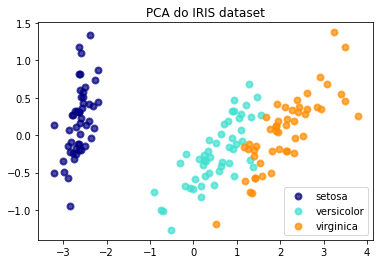

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit(X).transform(X)

# Porcentagem de variância explicada por cada componente
print('porcentagem de variância explicada por cada componente(os dois primeiros): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.7, lw=2,
                label=class_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA do IRIS dataset')
plt.show()

In [15]:
print(X.shape)

(150, 2)


### Separar em dois conjuntos de dados (treinamento e teste)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 

## Aplicação do KNN

Taxa de acerto =  94.74 %



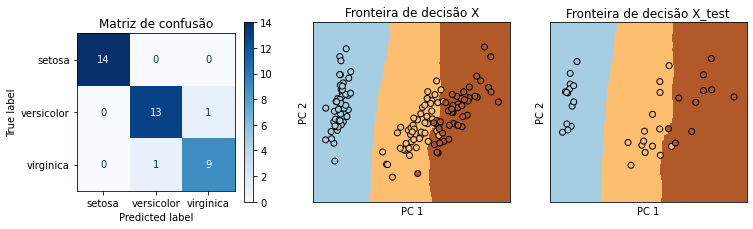

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%\n")
# Plota a matriz de confusão e fronteiras de decisão de X e X_test)
# matriz de confusão
plt.figure(figsize=(12, 3.3))
ax1 = plt.subplot(131)
ax1.set_aspect(1)
plt.title("Matriz de confusão")
metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, 
                                              display_labels=class_names,
                                              cmap=plt.cm.Blues, ax = ax1)
# Fronteira de decisão dados de treino X
plt.subplot(132)
plt.title("Fronteira de decisão X")
plot_decision_bound(knn,X,y)
# Fronteira de decisão dados de teste X_test
plt.subplot(133)
plt.title("Fronteira de decisão X_test")
plot_decision_bound(knn,X_test,y_test)

#print('Matriz de confusão:\n')
#print(cm_knn.confusion_matrix)

## Aplicação da Regressão Logística

Taxa de acerto =  86.84 %



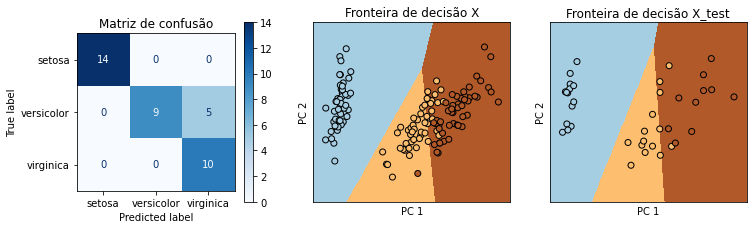

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)
acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%\n")

# Plota a matriz de confusão e fronteiras de decisão de X e X_test)
# matriz de confusão
plt.figure(figsize=(12, 3.3))
ax1 = plt.subplot(131)
ax1.set_aspect(1)
plt.title("Matriz de confusão")
metrics.ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, 
                                              display_labels=class_names,
                                              cmap=plt.cm.Blues, ax = ax1)
# Fronteira de decisão dados de treino X
plt.subplot(132)
plt.title("Fronteira de decisão X")
plot_decision_bound(logreg,X,y)
# Fronteira de decisão dados de teste X_test
plt.subplot(133)
plt.title("Fronteira de decisão X_test")
plot_decision_bound(logreg,X_test,y_test)

#print('Matriz de confusão:\n')
#print(cm_logreg.confusion_matrix)

## Aplicação do SVM

Taxa de acerto =  97.37 %



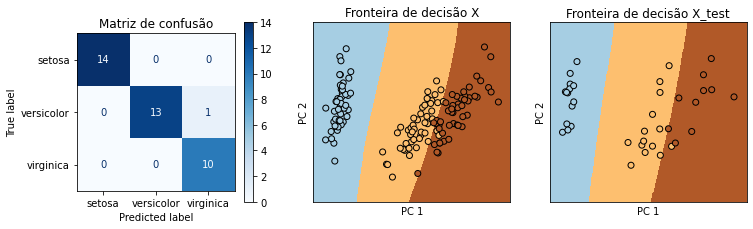

In [19]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)
acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%\n")

# Plota a matriz de confusão e fronteiras de decisão de X e X_test)
# matriz de confusão
plt.figure(figsize=(12, 3.3))
ax1 = plt.subplot(131)
ax1.set_aspect(1)
plt.title("Matriz de confusão")
metrics.ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, 
                                              display_labels=class_names,
                                              cmap=plt.cm.Blues, ax = ax1)
# Fronteira de decisão dados de treino X
plt.subplot(132)
plt.title("Fronteira de decisão X")
plot_decision_bound(svm,X,y)
# Fronteira de decisão dados de teste X_test
plt.subplot(133)
plt.title("Fronteira de decisão X_test")
plot_decision_bound(svm,X_test,y_test)

#print('Matriz de confusão:\n')
#print(cm_svm.confusion_matrix)

## Aplicação da rede MLP

Taxa de acerto =  94.74 %



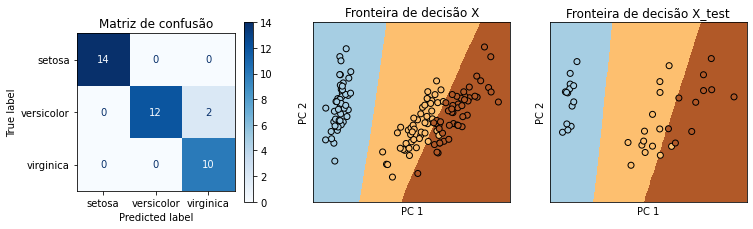

In [20]:
from sklearn.neural_network import MLPClassifier
#import warnings

#warnings.simplefilter("ignore")
mlp = MLPClassifier(hidden_layer_sizes=(30,), solver='lbfgs', max_iter = 500)
mlp.fit(X_train, y_train)
classificacoes_mlp = mlp.predict(X_test)
acertos_mlp = metrics.accuracy_score(y_test, classificacoes_mlp)
print('Taxa de acerto = ',round(acertos_mlp*100,2),"%\n")

# Plota a matriz de confusão e fronteiras de decisão de X e X_test)
# matriz de confusão
plt.figure(figsize=(12, 3.3))
ax1 = plt.subplot(131)
ax1.set_aspect(1)
plt.title("Matriz de confusão")
metrics.ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, 
                                              display_labels=class_names,
                                              cmap=plt.cm.Blues, ax = ax1)
# Fronteira de decisão dados de treino X
plt.subplot(132)
plt.title("Fronteira de decisão X")
plot_decision_bound(mlp,X,y)
# Fronteira de decisão dados de teste X_test
plt.subplot(133)
plt.title("Fronteira de decisão X_test")
plot_decision_bound(mlp,X_test,y_test)

#print('Matriz de confusão:\n')
#print(cm_mlp.confusion_matrix)